En esta práctica vamos a generar una secuencia de valores pesos de diferentes hombres.

Tienes que, usando las librerías vistas en este tema y google collab, mostrar:

* Media, mediana y rangos.
* Desviación estándar muestral.
* Dibujar distribución de datos e histograma.
* Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay).
* Dibujar un boxplot.
* Estandarizar los datos de las tres formas que se han visto.

A continuación tenéis el código con el que debéis comenzar vuestra práctica.



In [2]:
import numpy as np
import pandas as pd

# Generación de datos
# ==============================================================================
mu, sigma = 75, 15 # media y desviación típica de la población
# Generamos una muestra de tamaño 500
np.random.seed(1)
datos = np.random.normal(mu, sigma, 500)
# Cambiamos los valores de dos datos para convertirlos en outliers
datos[50]=100
datos[75]=1
datos[150]=250
datos[300]=-10
datos

array([ 99.36518045,  65.8236538 ,  67.07742372,  58.90547067,
        87.98111444,  40.47691955, 101.17217646,  63.58189649,
        79.78558644,  71.25944437,  96.93161906,  44.09788936,
        70.16374194,  69.23918468,  92.00654164,  58.50163099,
        72.41357689,  61.83212373,  75.6332062 ,  83.74222821,
        58.49071234,  92.17085565,  88.52386081,  82.53741508,
        88.51283924,  64.74408211,  73.15664662,  60.96345849,
        70.98167881,  82.955332  ,  64.62508872,  69.0486971 ,
        64.6924095 ,  62.32191538,  64.93130804,  74.81003102,
        58.24034477,  78.51623547,  99.89703266,  86.13066241,
        72.12246671,  61.68556554,  63.79262559, 100.38681902,
        75.76211632,  65.4450653 ,  77.86373227, 106.50382705,
        76.80238429,  84.25804665, 100.        ,  69.7162523 ,
        57.86222703,  69.75985916,  71.8665865 ,  83.79934787,
        87.58475121,  88.96653122,  79.28380988,  88.27711746,
        63.68403089,  93.79302233,  82.69394731,  70.52

Media, mediana y rangos.

In [3]:
media = np.mean(datos)
mediana = np.median(datos)
rango = np.max(datos) - np.min(datos)
print(f'media = {media}, mediana = {mediana}, rango = {rango}')

media = 75.88254434431963, mediana = 75.58180382827763, rango = 260.0


Desviación estándar muestral.


In [4]:
np.std(datos)

17.428000115668254

Dibujar distribución de datos e histograma.

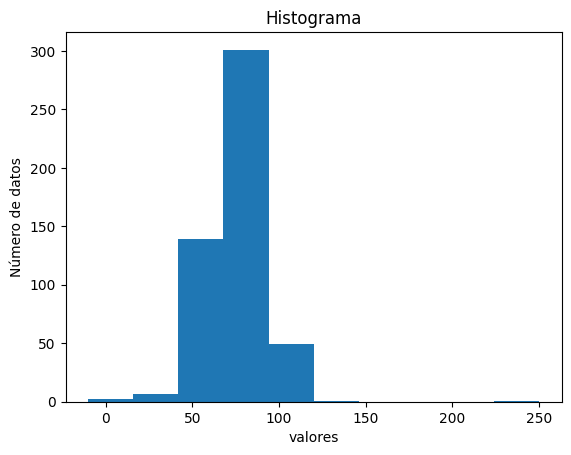

In [5]:
import matplotlib.pyplot as plt

plt.hist(datos)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

In [6]:
data = pd.DataFrame(datos)
data.describe()

,0
count,500.000000
mean,75.882544
std,17.445454
min,-10.000000
25%,65.722082
50%,75.581804
75%,86.162040
max,250.000000


Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay).

 Metodo 1

In [9]:
import scipy.stats as st

p_g = 0.95
alfa_g = (1-p_g)/2

alfa = 1/(2*len(datos))
Z_alfa = st.norm.ppf(1-alfa/2)

alfa = round(alfa, 5)
Z_alfa = round(Z_alfa, 5)
print(f" Alfa = {alfa}")
print(f" CUANTIL Z_(1-alfa/2) = {Z_alfa}")

xL = np.mean(datos) - Z_alfa * np.std(datos)
xU = np.mean(datos) + Z_alfa * np.std(datos)
print(f" Banda = [{xL}, {xU}]")

for i in range(len(datos)):
    if datos[i] < xL  or datos[i] > xU:
        print(f" El dato[{i}]={datos[i]} es un outlier")

 Alfa = 0.001
 CUANTIL Z_(1-alfa/2) = 3.29053
 Banda = [18.53518712370977, 133.2299015649295]
 El dato[75]=1.0 es un outlier
 El dato[150]=250.0 es un outlier
 El dato[300]=-10.0 es un outlier


Metodo 2

In [10]:
Q1 = np.quantile(datos, 0.25)
Q3 = np.quantile(datos, 0.75)
IQR = Q3 - Q1
k = 3
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}]")
for i in  range(len(datos)):
    if datos[i] < xL  or datos[i]>xU:
        print(f" El dato[{i}]={datos[i]} es un outlier")

Bandas: [4.402207827140614,147.48191492762493]
 El dato[75]=1.0 es un outlier
 El dato[150]=250.0 es un outlier
 El dato[300]=-10.0 es un outlier


Dibujar un boxplot.

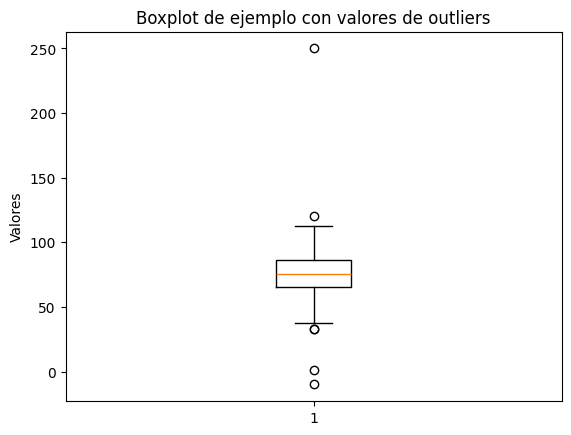

In [8]:
plt.boxplot(datos)

plt.title('Boxplot de ejemplo con valores de outliers')
plt.ylabel('Valores')

plt.show()

Estandarizar los datos de las tres formas que se han visto.